# Advanced Pandas - Learning beyond basics

## From Beginers to Advanced Pandas

### Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Intro to DataFrames

In [4]:
## Dictionary - Data

scores = {"name":['Ray', 'Japhy', 'Zosa'], 
          "city":['San Francisco', 'San Francisco', 'Denver'], 
          "score":[75,92,94]
    }

In [5]:
df = pd.DataFrame(scores)

In [6]:
df

,name,city,score
0,Ray,San Francisco,75
1,Japhy,San Francisco,92
2,Zosa,Denver,94


In [7]:
#Fetching  a column
                
df['score']

0    75
1    92
2    94
Name: score, dtype: int64

In [8]:
# Creating a new column 

df['name_city'] = df['name'] + '_' +df['city']
df

,name,city,score,name_city
0,Ray,San Francisco,75,Ray_San Francisco
1,Japhy,San Francisco,92,Japhy_San Francisco
2,Zosa,Denver,94,Zosa_Denver


In [9]:
# Show entries where score > 90 

df[df['score'] > 90]

,name,city,score,name_city
1,Japhy,San Francisco,92,Japhy_San Francisco
2,Zosa,Denver,94,Zosa_Denver


### Top Fucntions in Pandas

##### Importing data

In [10]:
# Importing data from csv/excel/json/parquette/database/etc. 

iris = pd.read_csv("./Exercise Files/iris.csv")

##### Explore the data

In [12]:
iris.shape

(150, 5)

In [14]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [15]:
iris.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


##### Datatypes

In [16]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

##### Subsetting your data with loc & iloc

In [18]:
## Loc --> Subset with Index Lables (Either row index or column name)
## iLoc --> Subset by position (Either row number or column order)

iris.loc[3:5] 

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [19]:
iris.loc[3,'sepal_length']

4.6

In [20]:
## Using iLoc to fetch the same

iris.iloc[3,0]

4.6

##### Exporting your data 

In [22]:
## Store the data to .csv

iris.to_csv('iris-output.csv', index=False) # Don't store index to output file
!dir

 Volume in drive C is OS
 Volume Serial Number is 48C7-93D1

 Directory of C:\Users\vikra\PythonTesting\Linked Learning\Pandas Advanced Training

15/03/2023  00:40    <DIR>          .
15/03/2023  00:06    <DIR>          ..
15/03/2023  00:06    <DIR>          .ipynb_checkpoints
15/03/2023  00:17    <DIR>          Exercise Files
15/03/2023  00:41             4,009 iris-output.csv
15/03/2023  00:40            17,696 Pandas Advanced Training.ipynb
               2 File(s)         21,705 bytes
               4 Dir(s)  121,071,259,648 bytes free


### Configuring Options using Pandas

In [24]:
## Emission datatype

emissions = pd.DataFrame({"country":['China', 'United States', 'India'], 
          "year":['2018', '2018', '2018'], 
          "co2_emissions":[10060000000.0,5410000000.0,2650000000.0]
    })

In [25]:
emissions

,country,year,co2_emissions
0,China,2018,1.006000e+10
1,United States,2018,5.410000e+09
2,India,2018,2.650000e+09


In [29]:
## set_option() - Show only 2 rows

pd.set_option('display.max_rows', 2)
emissions

,country,year,co2_emissions
0,China,2018,1.006000e+10
...,...,...,...
2,India,2018,2.650000e+09


In [30]:
# Show only 2 columns 

pd.set_option('display.max_columns', 2)
emissions

,country,...,co2_emissions
0,China,...,1.006000e+10
...,...,...,...
2,India,...,2.650000e+09


In [32]:
# set float format

pd.options.display.float_format = '{:,.2f}'.format
emissions

,country,...,co2_emissions
0,China,...,"10,060,000,000.00"
...,...,...,...
2,India,...,"2,650,000,000.00"


## Advanced Calculations

### Data Type conversions using Pandas

In [33]:
planets = pd.read_csv('./Exercise Files/planets.csv')

In [34]:
planets

,method,...,year
0,Radial Velocity,...,2006
...,...,...,...
1034,Transit,...,2008


In [35]:
# Remove set_option setting 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30,7.10,77.40,2006
1,Radial Velocity,1,874.77,2.21,56.95,2008
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
4,Radial Velocity,1,516.22,10.50,119.47,2009
5,Radial Velocity,1,185.84,4.80,76.39,2008
6,Radial Velocity,1,"1,773.40",4.64,18.15,2002
7,Radial Velocity,1,798.50,NaN,21.41,1996
8,Radial Velocity,1,993.30,10.30,73.10,2008
9,Radial Velocity,2,452.80,1.99,74.79,2010


In [37]:
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [39]:
planets.mean()

##shows only mean of available numeric data type

C:\Users\vikra\AppData\Local\Temp\ipykernel_16296\656747818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  planets.mean()


number               1.79
orbital_period   2,002.92
mass                 2.64
distance           264.07
year             2,009.07
dtype: float64

In [41]:
planets['number'][0]   --> #Selecting Column 'Number' for Index 0

1

In [42]:
# Integer divided by float ==> float

planets['number'][0] / planets['mass'][0] 


0.14084507042253522

In [43]:
## Convert Integer to Float 

planets['number'][0].astype(float)

1.0

In [44]:
## Convert Float  to Integer

planets['mass'][0].astype(int)

7

In [45]:
## Convert number to string 

planets['year'][0].astype(str)

'2006'

In [48]:
## Convert Datatime 

planets['year_dt'] = pd.to_datetime(planets['year'], format='%Y')
planets['year_dt'].head()

0   2006-01-01
1   2008-01-01
2   2011-01-01
3   2007-01-01
4   2009-01-01
Name: year_dt, dtype: datetime64[ns]

### Working with Strings

In [51]:
names = pd.Series(['Pomeray, CODY','Wanger; Jarry', 'smith, Ray' ])
names

0    Pomeray, CODY
1    Wanger; Jarry
2       smith, Ray
dtype: object

In [53]:
## replace()

names = names.str.replace(';',',')
names

0    Pomeray, CODY
1    Wanger, Jarry
2       smith, Ray
dtype: object

In [54]:
## len()

names.str.len()

0    13
1    13
2    10
dtype: int64

In [56]:
## strip()

names = names.str.strip()
names

0    Pomeray, CODY
1    Wanger, Jarry
2       smith, Ray
dtype: object

In [58]:
## lower(), upper()

names = names.str.lower()
names

0    pomeray, cody
1    wanger, jarry
2       smith, ray
dtype: object

In [59]:
## split()

names = names.str.split(',')
names

0    [pomeray,  cody]
1    [wanger,  jarry]
2       [smith,  ray]
dtype: object

In [60]:
## reverse the order for each row 

names = pd.Series([i[::-1] for i in names])
names

0    [ cody, pomeray]
1    [ jarry, wanger]
2       [ ray, smith]
dtype: object

In [61]:
## join each row prefixed space to single row

names = [' '.join(i) for i in names]
names

[' cody pomeray', ' jarry wanger', ' ray smith']

### Working with Dates

#### Generate series of dates

In [62]:
daterange = pd.period_range('1/1/2020', freq='30d', periods=4)


In [63]:
daterange

PeriodIndex(['2020-01-01', '2020-01-31', '2020-03-01', '2020-03-31'], dtype='period[30D]')

In [64]:
## Create DataFrame out of date range

date_df = pd.DataFrame(data=daterange, columns=['sample date'])
date_df

,sample date
0,2020-01-01
1,2020-01-31
2,2020-03-01
3,2020-03-31


#### Date diff from prior date using diff()

In [65]:
date_df['date_difference'] = date_df['sample date'].diff(periods=1)
date_df

# Find the differen in date from previois  entry

,sample date,date_difference
0,2020-01-01,NaT
1,2020-01-31,<30 * Days>
2,2020-03-01,<30 * Days>
3,2020-03-31,<30 * Days>


#### First day of the month

In [67]:
date_df['first of month'] = date_df['sample date'].values.astype('datetime64[M]')
date_df

,sample date,date_difference,first of month
0,2020-01-01,NaT,2020-01-01
1,2020-01-31,<30 * Days>,2020-01-01
2,2020-03-01,<30 * Days>,2020-03-01
3,2020-03-31,<30 * Days>,2020-03-01


#### Date Types

In [68]:
date_df.dtypes

sample date           period[30D]
date_difference            object
first of month     datetime64[ns]
dtype: object

In [69]:
# Sample date is still not datetime format, covert 

date_df['sample date'] = date_df['sample date'].dt.to_timestamp()
date_df.dtypes

sample date        datetime64[ns]
date_difference            object
first of month     datetime64[ns]
dtype: object

#### Date Subtraction

In [70]:
date_df['sample date'] - date_df['first of month']

0    0 days
1   30 days
2    0 days
3   30 days
dtype: timedelta64[ns]

In [72]:
date_df['sample date'] - date_df['date_difference']

C:\Users\vikra\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  warnings.warn(


0          NaT
1   2020-01-01
2   2020-01-31
3   2020-03-01
dtype: datetime64[ns]

In [73]:
### timedelta() --> To specify the add/subtract of time to the function

date_df['sample date'] - pd.Timedelta('30 d')

0   2019-12-02
1   2020-01-01
2   2020-01-31
3   2020-03-01
Name: sample date, dtype: datetime64[ns]

#### More DateTime properties with dt.

In [74]:
date_df['sample date'].dt.day_name()

0    Wednesday
1       Friday
2       Sunday
3      Tuesday
Name: sample date, dtype: object

### Dealing with Missing Data

In [76]:
temps = pd.DataFrame({'sequence':[1,2,3,4,5], 
                       'measurement_type':['actual', 'actual', 'actual', None, 'estimated'],
                       'temperature_f':[67.24, 84.56, 91.61, None, 49.64]
    })
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,NaN
4,5,estimated,49.64


#### Using isna() to identify null values in DataFrame

In [77]:
temps.isna()

# return any cell with missing value

,sequence,measurement_type,temperature_f
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False


#### How is missing data handled?

In [78]:
temps['temperature_f'].cumsum()

# By default cumsum() skips Nulls - NaN 

0    67.24
1   151.80
2   243.41
3      NaN
4   293.05
Name: temperature_f, dtype: float64

In [79]:
temps['temperature_f'].cumsum(skipna=False)

# Skip all the subsequent entries post finding the first null

0    67.24
1   151.80
2   243.41
3      NaN
4      NaN
Name: temperature_f, dtype: float64

In [80]:
# can specify to retain NA dimesions in grouping - By defualt it will skip null

temps.groupby(by=['measurement_type']).max()

,sequence,temperature_f
measurement_type,,
actual,3,91.61
estimated,5,49.64


In [83]:
# Show the null values too
temps.groupby(by=['measurement_type'], dropna=False).max()



,sequence,temperature_f
measurement_type,,
actual,3,91.61
estimated,5,49.64
NaN,4,NaN


#### Dealing with missing date. The blunt approach of dropna()

In [84]:
# drop rows with null using axis=0, (default)
temps.dropna()

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
4,5,estimated,49.64


In [85]:
# drop columns with null using axis=1, (default)
temps.dropna(axis=1)

,sequence
0,1
1,2
2,3
3,4
4,5


#### Replace null values using fillna()

In [88]:
temps.fillna(0)

# May be problematic while calculating mean() as value 0 will bais.

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,0,0.00
4,5,estimated,49.64


In [89]:
temps.fillna(method='pad')

# Copy the previous available value while filling the nulls

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,actual,91.61
4,5,estimated,49.64


#### Interpolate

In [90]:
# Creates straight line estimate for ant null values (Seems it is mean)

temps.interpolate()

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,70.62
4,5,estimated,49.64


### Apply, Map & Applymap

In [97]:
df = pd.DataFrame({"Region":['North','West','East','South','North','West','East','South'],
          "Team":['One','One','One','One','Two','Two','Two','Two'],
          "Squad":['A','B','C','D','E','F','G','H'],
          "Revenue":[7500,5500,2750,6400,2300,3750,1900,575],
            "Cost":[5200,5100,4400,5300,1250,1300,2100,50]})

In [98]:
df

,Region,Team,Squad,Revenue,Cost
0,North,One,A,7500,5200
1,West,One,B,5500,5100
2,East,One,C,2750,4400
3,South,One,D,6400,5300
4,North,Two,E,2300,1250
5,West,Two,F,3750,1300
6,East,Two,G,1900,2100
7,South,Two,H,575,50


#### Apply - Allows you to harness functions to alter values along an axis in your datafram series

In [99]:
df['Profit'] = df.apply(lambda x: 'Profit' if x['Revenue'] > x['Cost'] else 'Loss', axis = 1)

In [100]:
df

,Region,Team,Squad,Revenue,Cost,Profit
0,North,One,A,7500,5200,Profit
1,West,One,B,5500,5100,Profit
2,East,One,C,2750,4400,Loss
3,South,One,D,6400,5300,Profit
4,North,Two,E,2300,1250,Profit
5,West,Two,F,3750,1300,Profit
6,East,Two,G,1900,2100,Loss
7,South,Two,H,575,50,Profit


#### Map - allows you to substitue each value in Series, using either a function, dictonary or series

In [102]:
team = {"One": "Red", "Two": "Blue"}

In [103]:
df["Team Color"] = df["Team"].map(team)
df

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,North,One,A,7500,5200,Profit,Red
1,West,One,B,5500,5100,Profit,Red
2,East,One,C,2750,4400,Loss,Red
3,South,One,D,6400,5300,Profit,Red
4,North,Two,E,2300,1250,Profit,Blue
5,West,Two,F,3750,1300,Profit,Blue
6,East,Two,G,1900,2100,Loss,Blue
7,South,Two,H,575,50,Profit,Blue


#### Applymap - allow to apply function to each value in your dataframe

In [105]:
df.applymap(lambda x: len(str(x)))  # Find the length of each value from DF

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,5,3,1,4,4,6,3
1,4,3,1,4,4,6,3
2,4,3,1,4,4,4,3
3,5,3,1,4,4,6,3
4,5,3,1,4,4,6,4
5,4,3,1,4,4,6,4
6,4,3,1,4,4,4,4
7,5,3,1,3,2,6,4


#### If all else fails, use a for loop

In [107]:
len(df)
## Retrun number of rows

8

In [108]:
new_col = []

for i in range(0, len(df)):
    rev = df['Revenue'][i]/df[df['Region'] == df.loc[i, "Region"]]['Revenue'].sum()
    new_col.append(rev)
    


In [109]:
df['Revenue Share of Region'] = new_col
df.sort_values(by='Region')

,Region,Team,Squad,Revenue,Cost,Profit,Team Color,Revenue Share of Region
2,East,One,C,2750,4400,Loss,Red,0.59
6,East,Two,G,1900,2100,Loss,Blue,0.41
0,North,One,A,7500,5200,Profit,Red,0.77
4,North,Two,E,2300,1250,Profit,Blue,0.23
3,South,One,D,6400,5300,Profit,Red,0.92
7,South,Two,H,575,50,Profit,Blue,0.08
1,West,One,B,5500,5100,Profit,Red,0.59
5,West,Two,F,3750,1300,Profit,Blue,0.41


## Transforming DataFrames

### Groupby and Agrregation 

In [3]:
iris = pd.read_csv("./Exercise Files/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### A simple group by one dimesion with on aggregation for all values 

In [4]:
iris.groupby(['species']).max()

# shows max for each column in shown


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


#### Multiple aggregation methods to different values

In [11]:
df = iris.groupby(['species']).agg({'sepal_length':['mean', 'min', 'max'], 'sepal_width':'count'})
df

sepal_length           sepal_width
                   mean  min  max       count
species                                      
setosa            5.006  4.3  5.8          50
versicolor        5.936  4.9  7.0          50
virginica         6.588  4.9  7.9          50

In [12]:
df['sepal_length']

,mean,min,max
species,,,
setosa,5.006,4.3,5.8
versicolor,5.936,4.9,7.0
virginica,6.588,4.9,7.9


#### Falttening hierarchical indexes

In [14]:
for col in df.columns.values:  ## Tow layer of columns, hence retruned tuple
    print(col)

('sepal_length', 'mean')
('sepal_length', 'min')
('sepal_length', 'max')
('sepal_width', 'count')


In [15]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.reset_index
df
              

,sepal_length_mean,sepal_length_min,sepal_length_max,sepal_width_count
species,,,,
setosa,5.006,4.3,5.8,50
versicolor,5.936,4.9,7.0,50
virginica,6.588,4.9,7.9,50


#### Specify groupings prior to any aggregation

In [16]:
groupings = iris.groupby(['species'])

In [17]:
groupings.get_group('setosa').head()  ## get_group() works as  where clause in SQL

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
groupings.max()  ## Max for each groups

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [19]:
groupings.apply(lambda x: x.max())

,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,
setosa,5.8,4.4,1.9,0.6,setosa
versicolor,7.0,3.4,5.1,1.8,versicolor
virginica,7.9,3.8,6.9,2.5,virginica


In [22]:
groupings.filter(lambda x: x['petal_length'].max() < 5)    ## --> Will only retrun setosa species as ot was part of get_grouping()

## Having clause in SQL (Return values where petal length  max < 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Reshaping DataFrames (Pivot, Stcak)

#### Pivot

In [24]:
df = pd.DataFrame({"Region":['North','West','East','South','North','West','East','South'],
          "Team":['One','One','One','One','Two','Two','Two','Two'],
          "Squad":['A','B','C','D','E','F','G','H'],
          "Revenue":[7500,5500,2750,6400,2300,3750,1900,575],
            "Cost":[5200,5100,4400,5300,1250,1300,2100,50]})
df

,Region,Team,Squad,Revenue,Cost
0,North,One,A,7500,5200
1,West,One,B,5500,5100
2,East,One,C,2750,4400
3,South,One,D,6400,5300
4,North,Two,E,2300,1250
5,West,Two,F,3750,1300
6,East,Two,G,1900,2100
7,South,Two,H,575,50


In [25]:
df.pivot(index='Region', columns='Team', values ='Revenue')

Team,One,Two
Region,,
East,2750,1900
North,7500,2300
South,6400,575
West,5500,3750


#### Stack

In [26]:
## Pivot column labels to our rows
# Before we do that we need to create multi index for our dataframe

df2 = df.set_index(['Region', 'Team'])
df2

,,Squad,Revenue,Cost
Region,Team,,,
North,One,A,7500,5200
West,One,B,5500,5100
East,One,C,2750,4400
South,One,D,6400,5300
North,Two,E,2300,1250
West,Two,F,3750,1300
East,Two,G,1900,2100
South,Two,H,575,50


In [28]:
stacked = pd.DataFrame(df2.stack())
stacked

0
Region Team              
North  One  Squad       A
            Revenue  7500
            Cost     5200
West   One  Squad       B
            Revenue  5500
            Cost     5100
East   One  Squad       C
            Revenue  2750
            Cost     4400
South  One  Squad       D
            Revenue  6400
            Cost     5300
North  Two  Squad       E
            Revenue  2300
            Cost     1250
West   Two  Squad       F
            Revenue  3750
            Cost     1300
East   Two  Squad       G
            Revenue  1900
            Cost     2100
South  Two  Squad       H
            Revenue   575
            Cost       50

#### Unstack

In [29]:
stacked.unstack()

#Pivot row labels to our columns.By default the last column in index gets unstacked

0              
            Squad Revenue  Cost
Region Team                    
East   One      C    2750  4400
       Two      G    1900  2100
North  One      A    7500  5200
       Two      E    2300  1250
South  One      D    6400  5300
       Two      H     575    50
West   One      B    5500  5100
       Two      F    3750  1300

In [30]:
## Unstack by region 

stacked.unstack(['Region'])

0                  
Region        East North South  West
Team                                
One  Squad       C     A     D     B
     Revenue  2750  7500  6400  5500
     Cost     4400  5200  5300  5100
Two  Squad       G     E     H     F
     Revenue  1900  2300   575  3750
     Cost     2100  1250    50  1300

#### Melt

In [31]:
## This allows for you to reformat your df to identity columns as 'ID variables' while transforming
## all the other columns or "measurable variables" to row label

In [32]:
df.head(3)

,Region,Team,Squad,Revenue,Cost
0,North,One,A,7500,5200
1,West,One,B,5500,5100
2,East,One,C,2750,4400


In [33]:
df.melt(id_vars=['Region', 'Team'], var_name = 'value type')

,Region,Team,value type,value
0,North,One,Squad,A
1,West,One,Squad,B
2,East,One,Squad,C
3,South,One,Squad,D
4,North,Two,Squad,E
5,West,Two,Squad,F
6,East,Two,Squad,G
7,South,Two,Squad,H
8,North,One,Revenue,7500
9,West,One,Revenue,5500


#### Supporting aggregation with pivot_table

In [35]:
## All the reshaping method used above are only applied when there is unique combination for row to col

## If not, then aggregation under the pivot can be used
## e.g. say there are multipl revenue in each  region/team

In [36]:
#mean by default 
df.pivot_table(index='Team', values='Revenue')

,Revenue
Team,
One,5537.50
Two,2131.25


In [38]:
#Let's add region as column
df.pivot_table(index='Team', columns = 'Region',  values='Revenue')

# Mean for each region and team 
# pivot_table -- Act as group by and the unstacks the columns you specify 

Region,East,North,South,West
Team,,,,
One,2750,7500,6400,5500
Two,1900,2300,575,3750


### Merging (merge, join) and concatenating (concat) dataframes

In [39]:
df1 = pd.DataFrame({'letter' :['A', 'B', 'C', 'D'], 
                    'number' :[1,2,3,4]})
df2 = pd.DataFrame({'letter' :['C', 'D', 'E', 'F'], 
                    'number' :[3,4,5,6]})

#### Left Join using merge

In [40]:
df1.merge(df2, how='left', on='number')

,letter_x,number,letter_y
0,A,1,NaN
1,B,2,NaN
2,C,3,C
3,D,4,D


#### Inner join using merge

In [41]:
df1.merge(df2, how='inner', left_on='number', right_on='number')

,letter_x,number,letter_y
0,C,3,C
1,D,4,D


#### Right Join using Merge

In [42]:
## reveres the order of left join 

df1.merge(df2, how='right', on='number', suffixes=('','_right'))

,letter,number,letter_right
0,C,3,C
1,D,4,D
2,NaN,5,E
3,NaN,6,F


 #### Union with concat()

In [45]:
 ## drop duplicates with .drop_duplicates()

df3 = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)
df3

,letter,number
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6


#### Concatenate dataframes horizontally

In [47]:
df4 = pd.concat([df1,df2], axis=1)
df4

,letter,number,letter,number
0,A,1,C,3
1,B,2,D,4
2,C,3,E,5
3,D,4,F,6


#### Append new row to your dataframe

In [49]:
## Append dataframes vertically 

new_row = pd.Series(['Z',26],index=df3.columns)
df3.append(new_row, ignore_index=True)

C:\Users\vikra\AppData\Local\Temp\ipykernel_23632\2709437735.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3.append(new_row, ignore_index=True)


,letter,number
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6
6,Z,26


#### Join along your index

In [50]:
join_df = pd.DataFrame({'letter' :['F','G','H','I'], 
                       'number':[6,7,8,9]})


In [51]:
df2

,letter,number
0,C,3
1,D,4
2,E,5
3,F,6


In [52]:
df2.join(join_df, rsuffix='-_right')

,letter,number,letter-_right,number-_right
0,C,3,F,6
1,D,4,G,7
2,E,5,H,8
3,F,6,I,9


### Mapping Variables into groups

#### Categorizing & Lablelling data

In [53]:
df = pd.DataFrame({"Species":['Chinook','Chum','Coho','Steelhead','Bull Trout'],
             "Population":['Skokomish','Lower Skokomish','Skokomish','Skokomish','SF Skokomish'],
             "Count":[1208,2396,3220,6245,8216]})
df

,Species,Population,Count
0,Chinook,Skokomish,1208
1,Chum,Lower Skokomish,2396
2,Coho,Skokomish,3220
3,Steelhead,Skokomish,6245
4,Bull Trout,SF Skokomish,8216


#### Binning Numerical Data with pd.cut

In [54]:
import numpy as np
bins = [0,2000,4000, 6000, 8000, np.inf]  #Higher values until infinity
labels = ['Low Return', 'Below Avg Return', 'Avg Return', 'Above Avg Return', 'High Return']

In [55]:
bins

[0, 2000, 4000, 6000, 8000, inf]

In [56]:
df['Count Category'] = pd.cut(df['Count'], bins, labels=labels)
df

,Species,Population,Count,Count Category
0,Chinook,Skokomish,1208,Low Return
1,Chum,Lower Skokomish,2396,Below Avg Return
2,Coho,Skokomish,3220,Below Avg Return
3,Steelhead,Skokomish,6245,Above Avg Return
4,Bull Trout,SF Skokomish,8216,High Return


#### Map Species to endangered Status

In [57]:
fed_status = {'Chinook' : 'Threatened', 
             'Chum': 'Not Warranted', 
             'Coho': 'Not Warranted', 
             'Steelhead': 'Threatened'}

In [58]:
df['Federal Status'] = df['Species'].map(fed_status)
df

,Species,Population,Count,Count Category,Federal Status
0,Chinook,Skokomish,1208,Low Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
3,Steelhead,Skokomish,6245,Above Avg Return,Threatened
4,Bull Trout,SF Skokomish,8216,High Return,NaN


#### Introducing the categorical data Type

In [59]:
## Creating categories comparing to our original labels
df['Count Category'] = pd.Categorical(df['Count Category'], ordered=True, categories=labels)
df['Count Category']

0          Low Return
1    Below Avg Return
2    Below Avg Return
3    Above Avg Return
4         High Return
Name: Count Category, dtype: category
Categories (5, object): ['Low Return' < 'Below Avg Return' < 'Avg Return' < 'Above Avg Return' < 'High Return']

In [60]:
df.sort_values(by=['Count Category'], ascending=False)

,Species,Population,Count,Count Category,Federal Status
4,Bull Trout,SF Skokomish,8216,High Return,NaN
3,Steelhead,Skokomish,6245,Above Avg Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
0,Chinook,Skokomish,1208,Low Return,Threatened


#### Use get_dummies() to convert a Categorical variable into a Dummy variable

In [61]:
pd.get_dummies(df['Count Category'])
# Take a categorical variable and perform one hot encoding. 
# By which we create a column with each category and place 1 if true, else false

,Low Return,Below Avg Return,Avg Return,Above Avg Return,High Return
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


## Exploratory Data Analysis & Visualisation

### Plotting with Pandas

In [65]:
daterange = pd.period_range('1/1950', freq='1d', periods=50)
date_df = pd.DataFrame(data=daterange, columns=['day'])
date_df['value1'] = np.random.randint(45, 65, size=(len(date_df)))
date_df['value2'] = np.random.randint(25, 35, size=(len(date_df)))
date_df.head(3)
                                
                                      

,day,value1,value2
0,1950-01-01,53,28
1,1950-01-02,47,25
2,1950-01-03,47,33


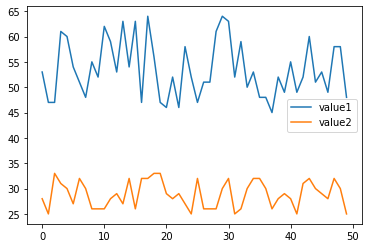

In [66]:
ax = date_df.plot();

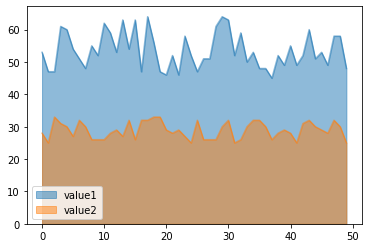

In [69]:
date_df.plot.area(stacked=False);

In [70]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


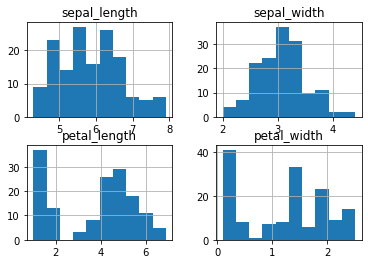

In [71]:
iris.hist();

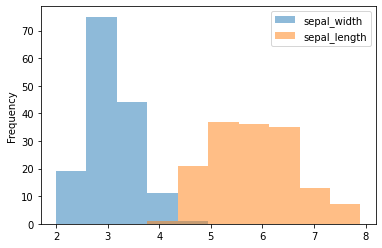

In [74]:
iris[['sepal_width', 'sepal_length']].plot.hist(alpha=0.5);

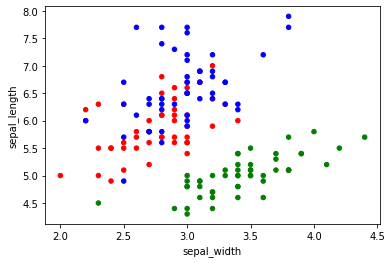

In [76]:
## scatterplot

colors = {'versicolor':'red', 'setosa': 'green', 'virginica': 'blue'}
iris['colors'] = iris['species'].map(colors)
iris.plot.scatter(x='sepal_width', y='sepal_length', color=iris['colors']);

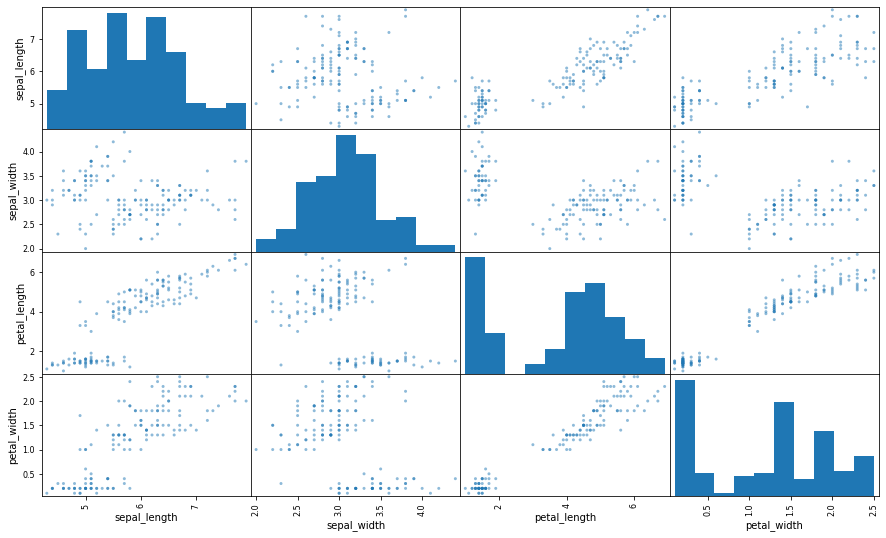

In [77]:
## scatter matrix
from pandas.plotting import scatter_matrix 

scatter_matrix(iris, figsize=(15,9),);

### Correlation and Statistical functions

#### Measure of central tendancy

In [78]:
iris.mean()

C:\Users\vikra\AppData\Local\Temp\ipykernel_23632\935066809.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.mean()


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [79]:
iris.median()

C:\Users\vikra\AppData\Local\Temp\ipykernel_23632\1297003277.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.median()


sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [80]:
iris.mode()

,sepal_length,sepal_width,petal_length,petal_width,species,colors
0,5.0,3.0,1.4,0.2,setosa,blue
1,NaN,NaN,1.5,NaN,versicolor,green
2,NaN,NaN,NaN,NaN,virginica,red


#### Variance Measures

In [81]:
iris.std()

C:\Users\vikra\AppData\Local\Temp\ipykernel_23632\3849825860.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.std()


sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

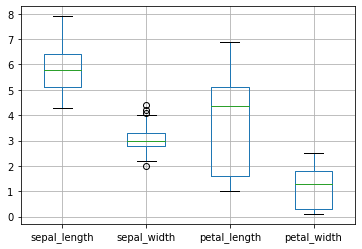

In [83]:
iris.boxplot();

#### Quick insight with describe()

In [85]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Relationship between variables

In [86]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [93]:
iris.corr().style.background_gradient(axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Beyond Pandas

### Accelerate EDA with Pandas-profiling

In [97]:
## Exploratory Data - Create a profile 
import pandas as pd
from pandas_profiling import ProfileReport

C:\Users\vikra\AppData\Local\Temp\ipykernel_23632\1964050535.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [96]:
pip install pandas_profiling


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [98]:
profile = ProfileReport(iris, title = 'Iris Data Profile')

In [99]:
profile.to_notebook_iframe()

#profile.to_widget()  --> If using Jupyternotebook

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Explore Geographic data with GeoPandas

In [100]:
### Refer the exercise 

In [102]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 8.4 MB/s eta 0:00:00

Note: you may need to restart the kernel to use updated packages.[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



In [103]:
import geopandas

In [104]:
peaks = pd.DataFrame(
    {'Peak Name': ['Green Mtn.', 'So. Boulder Peak', 'Bear Peak', 'Flagstaff Mtn.', 'Mt. Sanitas'],
     'Latitude': [39.9821, 39.9539, 39.9603, 40.0017, 40.0360968],
     'Longitude': [-105.3016, -105.2992, -105.2952, -105.3075, -105.3061024]})

In [105]:
gdf = geopandas.GeoDataFrame(
    peaks, geometry=geopandas.points_from_xy(peaks.Longitude, peaks.Latitude))
gdf

,Peak Name,Latitude,Longitude,geometry
0,Green Mtn.,39.982100,-105.301600,POINT (-105.30160 39.98210)
1,So. Boulder Peak,39.953900,-105.299200,POINT (-105.29920 39.95390)
2,Bear Peak,39.960300,-105.295200,POINT (-105.29520 39.96030)
3,Flagstaff Mtn.,40.001700,-105.307500,POINT (-105.30750 40.00170)
4,Mt. Sanitas,40.036097,-105.306102,POINT (-105.30610 40.03610)


In [108]:
pip install plotly


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [110]:
import plotly.express as px
px.set_mapbox_access_token(token)   ## Need Mapbox Token - Free available
gdf['size'] = 65

fig = px.scatter_mapbox(gdf,
                        lat=gdf.geometry.y,
                        lon=gdf.geometry.x,
                        color="Peak Name",
                        hover_name="Peak Name",
                        mapbox_style='outdoors',
                        size='size',
                        zoom=10)

fig.show()

NameError: name 'token' is not defined